In [1]:
from matplotlib import pyplot as plt

In [2]:
def gen_point(A, k):
    p = [0, 0]
    
    p[0] += A[0][0] * ((1 - k) ** 3)
    p[1] += A[1][0] * ((1 - k) ** 3)
    
    p[0] += A[0][1] * (3 * k * (1 - k) ** 2)
    p[1] += A[1][1] * (3 * k * (1 - k) ** 2)
    
    p[0] += A[0][2] * (3 * (k ** 2) * (1 - k))
    p[1] += A[1][2] * (3 * (k ** 2) * (1 - k))
    
    p[0] += A[0][3] * (k ** 3)
    p[1] += A[1][3] * (k ** 3)
    
    return p

In [3]:
def gen_look_up(num, A):
    t = []
    look_up = []
    prev = [A[0][0], A[1][0]]

    for i in range(num + 1):
        ti = i / num

        cur = gen_point(A, ti)

        dist = ((cur[0] - prev[0]) ** 2 + (cur[1] - prev[1]) ** 2) ** 0.5

        if (i == 0):
            look_up.append(dist)
        else:
            look_up.append(dist + look_up[i - 1])

        t.append(ti)
        prev = cur
    
    return t, look_up

In [4]:
def bin_search(l, val):
    low = 0
    high = len(l) - 1
    
    while (high > low + 1):
        mid = (low + high) // 2
        
        if (l[mid] <= val):
            low = mid
        else:
            high = mid
    
    return low

In [5]:
def gen_path(n, t, look_up):
    x = []
    y = []

    k = []
    dist = []

    total_dist = look_up[-1]
    prev_index = 0

    for i in range(n + 1):
        dist_i = total_dist * i / n
        index = prev_index + bin_search(look_up[prev_index:], dist_i)

        k_i = ((dist_i - look_up[index]) / (look_up[index + 1] - look_up[index])) * (t[index + 1] - t[index]) + t[index]
        k.append(k_i)
        dist.append(dist_i)

        x_i, y_i = gen_point(P, k_i)
        x.append(x_i)
        y.append(y_i)

        prev_index = index
    
    return x, y, k, dist

In [6]:
def gen_limits(P):
    lims = [P[0][0], P[0][0], P[1][0], P[1][0]] # minX, maxX, minY, maxY

    for i in range(len(P[0])):
        if (P[0][i] < lims[0]):
            lims[0] = P[0][i]
        elif (P[0][i] > lims[1]):
            lims[1] = P[0][i]

        if (P[1][i] < lims[2]):
            lims[2] = P[1][i]
        elif (P[1][i] > lims[3]):
            lims[3] = P[1][i]
    
    return lims

In [24]:
def plot_total_dist(look_up_k, look_up_dist, path_k, path_dist):
    plt.xlim(0, 1)
    plt.ylim(0, look_up_dist[-1])
    plt.grid()
    plt.plot(look_up_k, look_up_dist, marker=".", markersize=4, markeredgecolor="red")
    plt.plot(path_k, path_dist, marker="X", markersize=8, markeredgecolor="blue")
    plt.show()

In [25]:
def plot_path(P, path_x, path_y):
    plt.xlim(limits[0] - 1, limits[1] + 1)
    plt.ylim(limits[2] - 1, limits[3] + 1)
    plt.grid()
    plt.plot(P[0], P[1], marker="o", markersize=10, color = "orange", markeredgecolor="orange", markerfacecolor="orange", animated = True)
    plt.plot(path_x, path_y, marker=".", markersize=5, markeredgecolor="blue", animated = True)
    plt.show()

In [26]:
def print_delta_dist(path_x, path_y):
    prev = [0, 0]
    
    for i in range(len(path_x)):
        if (i != 0):
            print(((path_x[i] - prev[0]) ** 2 + (path_y[i] - prev[1]) ** 2) ** 0.5)

        prev = [path_x[i], path_y[i]]

In [34]:
P = [[-1, 2, 3, -0.5],
     [4, 9, 1, 7]]

limits = gen_limits(P)
look_up_k, look_up_dist = gen_look_up(10000, P)
path_x, path_y, path_k, path_dist = gen_path(50, look_up_k, look_up_dist)

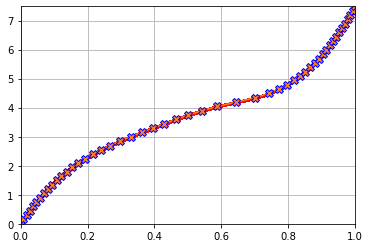

In [35]:
plot_total_dist(look_up_k, look_up_dist, path_k, path_dist)

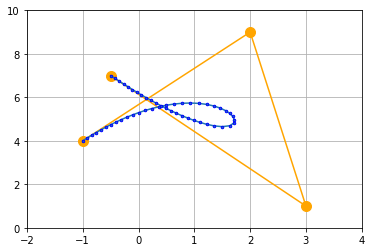

In [36]:
plot_path(P, path_x, path_y)

In [37]:
print_delta_dist(path_x, path_y)

0.14976970876518145
0.14976940045470435
0.14976900593705414
0.14976867293543547
0.14976805399435672
0.14976743251112462
0.14976637427866413
0.14976520982258823
0.14976338635073366
0.14976086547965536
0.1497572276301904
0.14975180724125303
0.14974367946249117
0.1497308664070085
0.14971084070568863
0.1496797137441879
0.149634118948585
0.14957683262612284
0.14952475027964504
0.14950469491509175
0.14952508709122259
0.14956523871599475
0.1496003168699856
0.1496168173299409
0.14960379337124205
0.14952463199883997
0.14917954854246435
0.14729914694120178
0.14606902542911335
0.14898128830633764
0.14958965262788398
0.1497078509827734
0.14974240655648524
0.14975564586629575
0.1497618411171247
0.14976510250155234
0.14976699399032178
0.14976811652134034
0.14976890797871997
0.14976940481965553
0.14976974956078629
0.14977003167407185
0.14977025324886234
0.14977037719626754
0.14977054998178205
0.1497704959266969
0.14977075260219203
0.14977065380827992
0.1497708339254006
0.14977082421632612
